In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import time

import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import re

import os
 

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB

from sklearn.metrics import accuracy_score


nltk.download('stopwords')

np.set_printoptions(suppress=True)  # no usar notacion "e"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pablonicolasr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.getcwd()

'C:\\Users\\pablonicolasr\\Desktop\\pablonicolas\\mentodatos\\mentodatos\\tercerentrega'

In [3]:
# load dataset
news_df = pd.read_csv(os.path.join(os.getcwd(), "data", "news_dataset.csv"))

news_df.head()

,id,ticker,title,category,content,release_date,provider,url,article_id
0,221515,NIO,Why Shares of Chinese Electric Car Maker NIO A...,news,What s happening\nShares of Chinese electric c...,2020-01-15,The Motley Fool,https://invst.ly/pigqi,2060327
1,221516,NIO,NIO only consumer gainer Workhorse Group amon...,news,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,2020-01-18,Seeking Alpha,https://invst.ly/pje9c,2062196
2,221517,NIO,NIO leads consumer gainers Beyond Meat and Ma...,news,Gainers NIO NYSE NIO 14 Village Farms In...,2020-01-15,Seeking Alpha,https://invst.ly/pifmv,2060249
3,221518,NIO,NIO NVAX among premarket gainers,news,Cemtrex NASDAQ CETX 85 after FY results \n...,2020-01-15,Seeking Alpha,https://invst.ly/picu8,2060039
4,221519,NIO,PLUG NIO among premarket gainers,news,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,2020-01-06,Seeking Alpha,https://seekingalpha.com/news/3529772-plug-nio...,2053096


In [4]:
# Check for nulll values
news_df.isnull().sum()

id              0
ticker          0
title           0
category        0
content         8
release_date    0
provider        0
url             0
article_id      0
dtype: int64

In [5]:
news_df = news_df[news_df["content"].notnull()]

In [6]:
news_df.shape

(221505, 9)

In [7]:
df_copy = news_df.copy()

In [8]:
df_copy = df_copy[["content", "title", "category"]]

In [9]:
df_copy.head()

,content,title,category
0,What s happening\nShares of Chinese electric c...,Why Shares of Chinese Electric Car Maker NIO A...,news
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,NIO only consumer gainer Workhorse Group amon...,news
2,Gainers NIO NYSE NIO 14 Village Farms In...,NIO leads consumer gainers Beyond Meat and Ma...,news
3,Cemtrex NASDAQ CETX 85 after FY results \n...,NIO NVAX among premarket gainers,news
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,PLUG NIO among premarket gainers,news


In [10]:
df_copy.category.value_counts(dropna=False)

opinion    125932
news        95573
Name: category, dtype: int64

# Map target label to String

In [11]:
def func(df):
    
    if df == "opinion":
        
        return 0

    elif df == "news":
        
        return 1    
    
    
df_copy["category"] = df_copy.category.apply(func)
df_copy.head()

,content,title,category
0,What s happening\nShares of Chinese electric c...,Why Shares of Chinese Electric Car Maker NIO A...,1
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,NIO only consumer gainer Workhorse Group amon...,1
2,Gainers NIO NYSE NIO 14 Village Farms In...,NIO leads consumer gainers Beyond Meat and Ma...,1
3,Cemtrex NASDAQ CETX 85 after FY results \n...,NIO NVAX among premarket gainers,1
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,PLUG NIO among premarket gainers,1


In [12]:
df_copy.category.value_counts(dropna=False)

0    125932
1     95573
Name: category, dtype: int64

# Count plot for labels feature

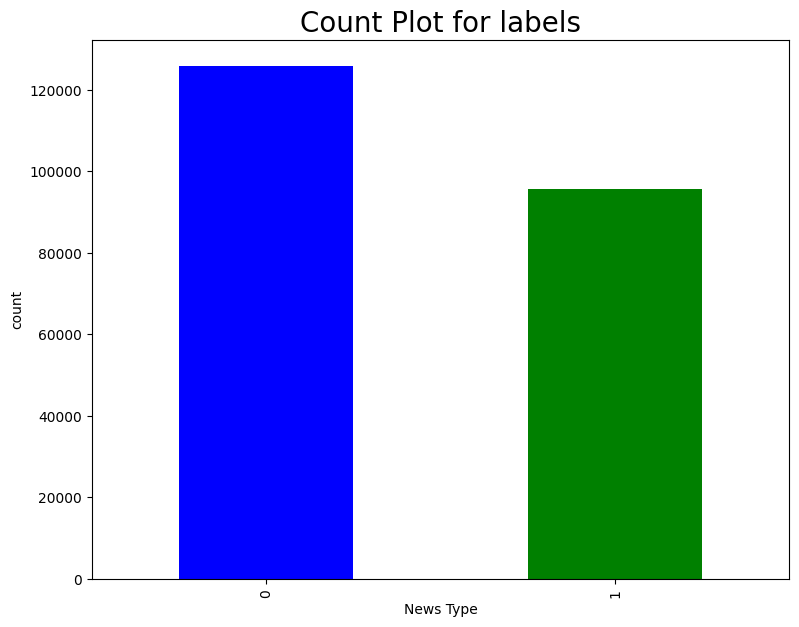

In [13]:
plt.figure(figsize=(9,7))

df_copy.category.value_counts().plot(kind='bar',color=['blue','green','red'])

plt.xlabel("News Type")
plt.ylabel("count")

plt.title("Count Plot for labels",{'fontsize':20});

# Text preprocessing

In [14]:
df_copy.head()

,content,title,category
0,What s happening\nShares of Chinese electric c...,Why Shares of Chinese Electric Car Maker NIO A...,1
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,NIO only consumer gainer Workhorse Group amon...,1
2,Gainers NIO NYSE NIO 14 Village Farms In...,NIO leads consumer gainers Beyond Meat and Ma...,1
3,Cemtrex NASDAQ CETX 85 after FY results \n...,NIO NVAX among premarket gainers,1
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,PLUG NIO among premarket gainers,1


In [15]:
df_copy["title_content"] = df_copy["content"] + df_copy["title"]

df_copy = df_copy[["title_content", "category"]]


df_copy.head()

,title_content,category
0,What s happening\nShares of Chinese electric c...,1
1,Gainers NIO NYSE NIO 7 \nLosers MGP Ingr...,1
2,Gainers NIO NYSE NIO 14 Village Farms In...,1
3,Cemtrex NASDAQ CETX 85 after FY results \n...,1
4,aTyr Pharma NASDAQ LIFE 63 on Kyorin Pharm...,1


In [16]:
corpus = []

#Object for porterstem
ps = PorterStemmer()

for i in range(len(df_copy)):
    try:
        text = str(df_copy.title_content[i])
        text = text.lower()
        text = re.sub(r"\s{2,}", " ", text)
        text = re.sub(r"\n", " ", text)
        text = re.sub(r"\d+", " ", text)
        text = re.sub(r"^\s+", " ", text)
        text = re.sub(r"\s+", " ", text)
        text = re.sub(r'[^a-zA-Z]',' ', text)    
        text = text.split()
        text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
        text = ' '.join(text)
        corpus.append(text)
    except:
        pass

In [17]:
corpus

['happen share chines electr car maker nio nyse nio sharpli higher wednesday morn chines busi news outlet report cash strap compani secur new financ major automak p est nio american depositari share ad tuesday close price accord report chines busi news site sina financ cite person familiar matter nio soon receiv cash infus billion guangzhou base gac group otc gnzuf press time neither nio gac confirm deni report gac one china big domest automak signific joint ventur honda motor fiat chrysler automobil among other gac fact decid make major invest nio neither compani confirm report nio futur bright import develop month public compani nio seen rise sale strong custom loyalti rapidli declin cash call futur question sept compani million remain billion march report accur deal close extrem bullish nio think auto investor tread bit care note earlier bailout deal fell last minut concern compani viabil use caution one share chines electr car maker nio fli high today',
 'gainer nio nyse nio loser 

# Se aplica word2vec desde aquí¶

Training Word Embeddings Until here I did not explain code so much with markdowns but the thing starts here so let's explain what will we do in this section.

In this section we're going to train word embeddings using our data and in order to train those word vectors we'll tokenize our data.

Tokenizing basically means splitting sentences into words (e.g. You are nice => ["You","are","nice"]) Then we'll train our model using gensim. I won't get into details of word2vec but you should learn them because if you don't know how they work it's meaningless to use it

In [18]:
x_tokenized = [[w for w in sentence.split(" ") if w != ""] for sentence in corpus]

x_tokenized[0]

['happen',
 'share',
 'chines',
 'electr',
 'car',
 'maker',
 'nio',
 'nyse',
 'nio',
 'sharpli',
 'higher',
 'wednesday',
 'morn',
 'chines',
 'busi',
 'news',
 'outlet',
 'report',
 'cash',
 'strap',
 'compani',
 'secur',
 'new',
 'financ',
 'major',
 'automak',
 'p',
 'est',
 'nio',
 'american',
 'depositari',
 'share',
 'ad',
 'tuesday',
 'close',
 'price',
 'accord',
 'report',
 'chines',
 'busi',
 'news',
 'site',
 'sina',
 'financ',
 'cite',
 'person',
 'familiar',
 'matter',
 'nio',
 'soon',
 'receiv',
 'cash',
 'infus',
 'billion',
 'guangzhou',
 'base',
 'gac',
 'group',
 'otc',
 'gnzuf',
 'press',
 'time',
 'neither',
 'nio',
 'gac',
 'confirm',
 'deni',
 'report',
 'gac',
 'one',
 'china',
 'big',
 'domest',
 'automak',
 'signific',
 'joint',
 'ventur',
 'honda',
 'motor',
 'fiat',
 'chrysler',
 'automobil',
 'among',
 'other',
 'gac',
 'fact',
 'decid',
 'make',
 'major',
 'invest',
 'nio',
 'neither',
 'compani',
 'confirm',
 'report',
 'nio',
 'futur',
 'bright',
 'impor

In [19]:
start = time.time()

model = gensim.models.Word2Vec(
    x_tokenized,
    vector_size=100
     # Size is the length of our vector.
)

end = round(time.time() - start, 2)

print(f"This process took {end} seconds.")

This process took 133.2 seconds.


In [20]:
model.wv.most_similar("total")

[('approxim', 0.7362103462219238),
 ('million', 0.683945894241333),
 ('net', 0.6326372623443604),
 ('billion', 0.6259502172470093),
 ('decreas', 0.6208656430244446),
 ('roughli', 0.6200537085533142),
 ('cumul', 0.6102476119995117),
 ('grew', 0.5524225831031799),
 ('annual', 0.540606677532196),
 ('revenuestot', 0.5388100743293762)]

Writing A Class To Create Sequences Our model is ready, but we need a class to convert texts to create word embedding sequences

In [21]:
class Sequencer():
    
    def __init__(self,
                 all_words,
                 max_words,
                 seq_len,
                 embedding_matrix
                ):
        
        self.seq_len = seq_len
        self.embed_matrix = embedding_matrix
        """
        temp_vocab = Vocab which has all the unique words
        self.vocab = Our last vocab which has only most used N words.
    
        """
        temp_vocab = list(set(all_words)) # Palabras unicas
        self.vocab = []
        self.word_cnts = {}
        """
        Now we'll create a hash map (dict) which includes words and their occurencies
        """
        for word in temp_vocab:
            # 0 does not have a meaning, you can add the word to the list
            # or something different.
            count = len([0 for w in all_words if w == word])
            self.word_cnts[word] = count
            counts = list(self.word_cnts.values())
            indexes = list(range(len(counts)))
        
        # Now we'll sort counts and while sorting them also will sort indexes.
        # We'll use those indexes to find most used N word.
        cnt = 0
        while cnt + 1 != len(counts):
            cnt = 0
            for i in range(len(counts)-1):
                if counts[i] < counts[i+1]:
                    counts[i+1],counts[i] = counts[i],counts[i+1]
                    indexes[i],indexes[i+1] = indexes[i+1],indexes[i]
                else:
                    cnt += 1
        
        for ind in indexes[:max_words]:
            self.vocab.append(temp_vocab[ind])
                    
    def textToVector(self,text):
        # First we need to split the text into its tokens and learn the length
        # If length is shorter than the max len we'll add some spaces (100D vectors which has only zero values)
        # If it's longer than the max len we'll trim from the end.
        tokens = text.split()
        len_v = len(tokens)-1 if len(tokens) < self.seq_len else self.seq_len-1
        vec = []
        for tok in tokens[:len_v]:
            try:
                vec.append(self.embed_matrix[tok])
            except Exception as E:
                pass
        
        last_pieces = self.seq_len - len(vec)
        for i in range(last_pieces):
            vec.append(np.zeros(100,))
        
        return np.asarray(vec).flatten()

Our class is ready, let's take a last look at that. In constructor function our class takes 4 parameters: all_words,max_words,seq_length,embedding_matrix All Words = This means give your all dataset in a list format which contains all tokens (not list of lists (sentences) concatenate all the sentences). Max Words = If your dataset has a lot of unique words you might want to limit the number of words. This parameter will be used in finding most used N (max_words) word. Sequence Length = In machine learning our dataset's number of variable has to be specified. But in real life each sentence might has a different length. In order to prevent this problem we'll determine a length and adapt our sentences to that length.

máxima cantidad de palabras por mensaje

In [22]:
len(max(x_tokenized, key=len))

11545

In [ ]:
sequencer = Sequencer(
    all_words = [token for seq in x_tokenized for token in seq],
    max_words = 1200,
    seq_len = 33,
    embedding_matrix = model.wv
)

In [ ]:
test_vec = sequencer.textToVector("million user decemb market share number")
test_vec

In [ ]:
test_vec.shape

# PCA (Principal Component Analysis)
Everything looks fine, but as you see each vector for a sentence has 1500 elements and it'll consume a lot of time to train a Support Vector Machine Classifier on this.

In order to prevent this problem, we'll use the power of Statistics, Principal Component Analysis. Principal Component Analysis is a way to reduce dimension of vectors. It maximizes the variance and creates N components.

In [ ]:
# But before creating a PCA model using scikit-learn let's create
# vectors for our each vector
x_vecs = np.asarray([sequencer.textToVector(" ".join(seq)) for seq in x_tokenized])
print(x_vecs.shape)

In [ ]:
pca_model = PCA(n_components=80)
pca_model.fit(x_vecs)

print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))

In [ ]:
x_comps = pca_model.transform(x_vecs)
x_comps.shape

In [ ]:
y_prep = df_copy['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_comps, y_prep, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)